In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../hba')
import visualization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [163]:
#ファイルの読込
df = pd.read_csv("../csv/全突合R4マスタ240523.csv")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
print(df)

0      病院 オープンデータ\n医療機関コード\n(R4)          医療機関名_x 都道府県コード_x 二次医療圏コード_x  \
0      病院              101010042         市立函館恵山病院         1        101   
1      病院              101010069  医療法人社団玄心会吉田眼科病院         1        101   
2      病院              101010044           市立函館病院         1        101   
3      病院              101010044           市立函館病院         1        101   
4      病院              101010044           市立函館病院         1        101   
...    ..                    ...              ...       ...        ...   
27921  病院             4747030020  医療法人徳洲会 南部徳洲会病院        47       4703   
27922  病院             4747030020  医療法人徳洲会 南部徳洲会病院        47       4703   
27923  病院             4747030020  医療法人徳洲会 南部徳洲会病院        47       4703   
27924  病院             4141040026        伊万里整形外科病院        41       4104   
27925  病院             4141040026        伊万里整形外科病院        41       4104   

0     二次医療圏名_x 構想区域コード_x 構想区域名称_x 市区町村コード_x 市区町村名称_x 医療機関コード（医科）_x  \
0          南渡島       101      南渡島      12

/tmp/ipykernel_853/3965993550.py:2: DtypeWarning: Columns (1,3,4,6,8,10,11,16,18,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../csv/全突合R4マスタ240523.csv")


In [164]:
df.columns

Index(['病院', 'オープンデータ\n医療機関コード\n(R4)', '医療機関名_x', '都道府県コード_x', '二次医療圏コード_x',
       '二次医療圏名_x', '構想区域コード_x', '構想区域名称_x', '市区町村コード_x', '市区町村名称_x',
       '医療機関コード（医科）_x', '医療機関コード（歯科）_x', '設置主体（2022（令和4）年7月1日時点）',
       'DPC医療機関群の種類', '特定機能病院の承認の有無', '地域医療支援病院の承認の有無', '病棟コード\n（R4）', '病棟名_x',
       '建築時期', '構造', '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
       '保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）', '一般病床_許可病床', '一般病床_最大使用病床数',
       '一般病床_最小使用病床数', '療養病床_許可病床', '療養病床_最大使用病床数', '療養病床_最小使用病床数',
       '新規入棟患者数（年間）', '在棟患者延べ数（年間）', '退棟患者数（年間）', '構想区域人口', '二次医療圏人口'],
      dtype='object', name=0)

In [165]:
#急性期病床のみ抽出
df = df.loc[df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"] ==  "急性期"].reset_index(drop=True)
df["医療機関名_x"].nunique()

4013

In [166]:
df = df[["医療機関名_x","都道府県コード_x","二次医療圏コード_x","一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）","二次医療圏人口"]]

PREF = ["都道府県コード_x","二次医療圏コード_x","二次医療圏人口"]
TARGETS = ["一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）"]
for col in TARGETS+["二次医療圏人口"]:
    df[col] = pd.to_numeric(df[col]) #object -> int64
df = df.groupby('医療機関名_x')[PREF + TARGETS
                            ].agg({**{m:'first' for m in PREF},**{t:'sum' for t in TARGETS}}).reset_index()

df["病床利用率"] = df["在棟患者延べ数（年間）"] * 100 / (df["一般病床_許可病床"] + df["療養病床_許可病床"]) / 365 #診療実日数を365日とする
df["平均院内日数"] = df["在棟患者延べ数（年間）"] / (df["新規入棟患者数（年間）"] + df["退棟患者数（年間）"]) * 2
df.head()

,医療機関名_x,都道府県コード_x,二次医療圏コード_x,二次医療圏人口,一般病床_許可病床,療養病床_許可病床,在棟患者延べ数（年間）,新規入棟患者数（年間）,退棟患者数（年間）,病床利用率,平均院内日数
0,AOI国際病院,14,1405,667767,114,0,39388,3585,3610,94.659938,10.948714
1,JA静岡厚生連遠州病院,22,2208,848603,320,0,78466,6102,5637,67.179795,13.368430
2,あいちせぼね病院,23,2306,793551,48,0,9412,1598,1604,53.721461,5.878826
3,あおぞら病院,44,4401,199000,30,0,10266,446,438,93.753425,23.226244
4,あおばウィメンズホスピタル,14,1412,1285373,20,0,3928,876,876,53.808219,4.484018


In [167]:
prefecture_region_map = {
    '1': 1, '2': 2, '3': 2, '4': 2, '5': 2, '6': 2, '7': 2,  # 北海道地方、東北地方
    '8': 3, '9': 3, '10': 3, '11': 3, '12': 3, '13': 3, '14': 3,  # 関東地方
    '15': 4, '16': 4, '17': 4, '18': 4, '19': 4, '20': 4, '21': 4, # 中部地方
    '22': 5, '23': 5, '24': 5,  # 東海地方
    '25': 6, '26': 6, '27': 6, '28': 6, '29': 6, '30': 6,  # 近畿地方
    '31': 7, '32': 7, '33': 7, '34': 7, '35': 7,  # 中国地方
    '36': 8, '37': 8, '38': 8, '39': 8,  # 四国地方
    '40': 9, '41': 9, '42': 9, '43': 9, '44': 9, '45': 9, '46': 9, '47': 9  # 九州地方
}
df["地方コード_x"] = df["都道府県コード_x"].astype(str).map(prefecture_region_map).astype(int)
df.head()

,医療機関名_x,都道府県コード_x,二次医療圏コード_x,二次医療圏人口,一般病床_許可病床,療養病床_許可病床,在棟患者延べ数（年間）,新規入棟患者数（年間）,退棟患者数（年間）,病床利用率,平均院内日数,地方コード_x
0,AOI国際病院,14,1405,667767,114,0,39388,3585,3610,94.659938,10.948714,3
1,JA静岡厚生連遠州病院,22,2208,848603,320,0,78466,6102,5637,67.179795,13.368430,5
2,あいちせぼね病院,23,2306,793551,48,0,9412,1598,1604,53.721461,5.878826,5
3,あおぞら病院,44,4401,199000,30,0,10266,446,438,93.753425,23.226244,9
4,あおばウィメンズホスピタル,14,1412,1285373,20,0,3928,876,876,53.808219,4.484018,3


In [168]:
#北海道地方の二次医療圏
print(len(df[df["平均院内日数"] == np.inf]))
df = df[df["平均院内日数"] != np.inf]
hokaido = df[df["都道府県コード_x"]=='1']
MONO = ["地方コード_x","二次医療圏人口"]
TARGETS = ["病床利用率","平均院内日数"]

sma_hokaido = hokaido.groupby('二次医療圏コード_x')[MONO + TARGETS
                            ].agg({**{m:'first' for m in MONO},**{t:'mean' for t in TARGETS}}).reset_index()
sma_hokaido

100


,二次医療圏コード_x,地方コード_x,二次医療圏人口,病床利用率,平均院内日数
0,101,1,359223,71.755206,24.514531
1,102,1,21139,35.104431,22.867082
2,103,1,359223,48.422236,30.824844
3,104,1,2396732,68.887121,17.145413
4,105,1,198888,73.989609,21.577079
5,106,1,2396732,43.688523,17.424788
6,107,1,99784,67.978880,15.224248
7,108,1,29694,75.783764,13.136255
8,109,1,176606,78.243428,18.956976
9,110,1,205748,58.725902,12.295597


あれ、おかしい??

In [169]:
hokaido.groupby('二次医療圏コード_x')["二次医療圏人口"].apply(lambda x: x.mode()[0]) #二次医療圏人口のデータに欠陥あり

二次医療圏コード_x
101     359223
102      21139
103      33405
104    2396732
105     198888
106     152486
107      99784
108      29694
109     176606
110     205748
111      63372
112     381296
113      60763
114      39894
115      43050
116      62140
117     208460
118      64902
119     332648
120     222613
121      71771
Name: 二次医療圏人口, dtype: int64

In [170]:
MONO = ["地方コード_x"]
sma_hokaido = hokaido.groupby('二次医療圏コード_x')[MONO + TARGETS
                            ].agg({**{m:'first' for m in MONO},**{t:'mean' for t in TARGETS}}).reset_index()
sma_hokaido = sma_hokaido.join(hokaido.groupby('二次医療圏コード_x')["二次医療圏人口"].apply(lambda x: x.mode()[0]), on='二次医療圏コード_x')
sma_hokaido

,二次医療圏コード_x,地方コード_x,病床利用率,平均院内日数,二次医療圏人口
0,101,1,71.755206,24.514531,359223
1,102,1,35.104431,22.867082,21139
2,103,1,48.422236,30.824844,33405
3,104,1,68.887121,17.145413,2396732
4,105,1,73.989609,21.577079,198888
5,106,1,43.688523,17.424788,152486
6,107,1,67.978880,15.224248,99784
7,108,1,75.783764,13.136255,29694
8,109,1,78.243428,18.956976,176606
9,110,1,58.725902,12.295597,205748


これで解決？？

In [171]:
df["二次医療圏コード_x"].nunique()

336

In [172]:
# 各2次医療圏に対して対応する地方が一意であるかを確認
unique_check = df.drop_duplicates().groupby("二次医療圏コード_x")["地方コード_x"].nunique()
non_unique_sma = unique_check[unique_check > 1].index.tolist()
print(non_unique_sma)

[]


In [173]:
print(len(df[df["平均院内日数"] == np.inf]))
df = df[df["平均院内日数"] != np.inf]
MONO = ["地方コード_x"]
TARGETS = ["病床利用率","平均院内日数"]

sma_df = df.groupby('二次医療圏コード_x')[MONO + TARGETS
                            ].agg({**{m:'first' for m in MONO},**{t:'mean' for t in TARGETS}}).reset_index()
sma_df = sma_df.join(df.groupby('二次医療圏コード_x')["二次医療圏人口"].apply(lambda x: x.mode()[0]), on='二次医療圏コード_x')
sma_df

0


,二次医療圏コード_x,地方コード_x,病床利用率,平均院内日数,二次医療圏人口
0,2604,6,89.675719,32.778144,1617143
1,2605,6,84.154431,16.832154,429990
2,2606,6,48.615173,8.934060,121118
3,2701,6,64.253045,14.295848,1056344
4,2702,6,89.973815,19.542749,758811
...,...,...,...,...,...
331,902,3,71.203935,23.190125,171694
332,903,3,86.043081,26.099504,518757
333,904,3,70.437328,18.518192,138202
334,905,3,67.216071,15.701158,476915


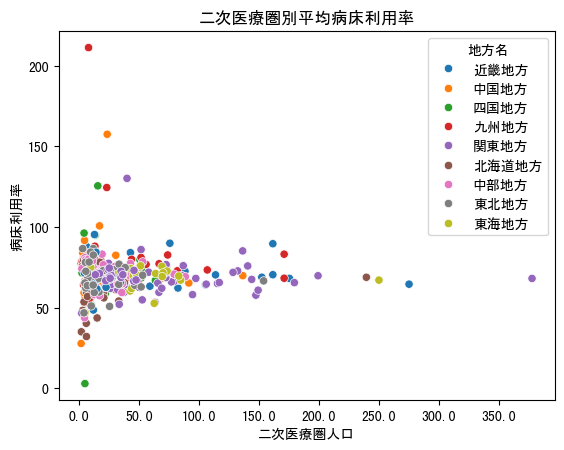

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

region_names = ['北海道地方', '東北地方', '関東地方', '中部地方', '東海地方', '近畿地方', '中国地方', '四国地方', '九州地方']
region_names_map = {y:x for x,y in zip(region_names,range(1,len(region_names)+1))}
sma_df["地方名"] = sma_df["地方コード_x"].map(region_names_map)

palette = sns.color_palette("tab10", 9)
fig, ax = plt.subplots()
sns.scatterplot(data=sma_df, x='二次医療圏人口', y='病床利用率', hue='地方名', palette=palette, ax=ax)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10000)))
plt.title('二次医療圏別平均病床利用率')
plt.show()

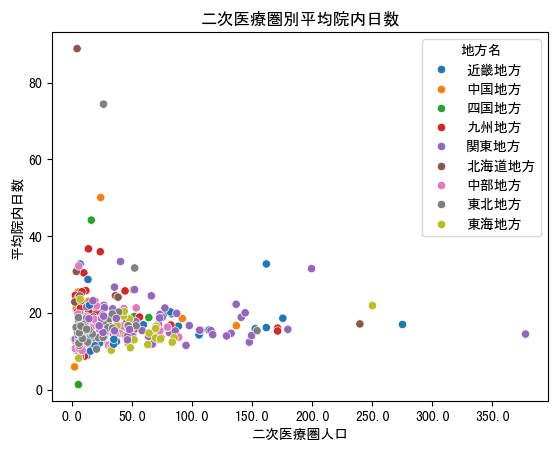

In [175]:
fig, ax = plt.subplots()
sns.scatterplot(data=sma_df, x='二次医療圏人口', y='平均院内日数', hue='地方名', palette=palette, ax=ax)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10000)))
plt.title('二次医療圏別平均院内日数')
plt.show()